# **LSTM(Long Short-Term Memory) 구조**

<img src="./image/rnn_lstm.jpg" />

- 단기 기억을 오래 기억하기 위해 고안되었음

<img src="./image/lstm.png" width="800" />

- 은닉 상태를 만드는 방법
    - output gate layer(출력 게이트)
        1. 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 은닉 상태를 만듦
            - 이 때 기본 순환층과는 달리 시그모이드 활성화 함수를 사용
        2. tanh 활성화 함수를 통과한 값과 곱해져서 은닉 상태를 만듦
- LSTM 은 순환 되는 상태가 2개
    - 은닉 상태
    - 셀 상태(cell state)
        - 다음 층으로 전달되지 않고 LSTM 층에서 순환만 되는 값
- 셀 상태를 계산하는 과정
    - forget gate layer(삭제 게이트)
        - 정보를 제거하는 역할
        1. 입력과 은닉 상태를 또 다른 가중치에 곱한 다음 시그모이드 함수를 통과
        2. 이전 타임스텝의 셀 상태와 곱하여 새로운 셀 상태를 만듦
            - 이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는 데 기여
    - input gate layer(입력 게이트)
        - 새로운 정보를 셀 상태에 추가
        1. 입력과 은닉 상태를 각기 다른 가중치에 곱함
        2. 하나는 시그모이드 함수, 하나는 tanh 함수를 통과
        3. 두 결과를 곱함
        4. 이전 셀 상태와 더함

## 1. 데이터 준비

In [53]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [55]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 500)

In [56]:
# 훈련 세트와 검증 세트로 나누기
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                  stratify = y_train, random_state = 26)

In [59]:
# 패딩
train_seq = pad_sequences(x_train, maxlen = 100)
val_seq = pad_sequences(x_val, maxlen = 100)

In [61]:
# LSTM 모델 생성
model = keras.Sequential()
model.add(keras.Input(shape = (100,)))
model.add(keras.layers.Embedding(500, 32))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [63]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 32)             │          16,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 8)                   │           1,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,321 (67.66 KB)

 Trainable params: 17,321 (67.66 KB)

 Non-trainable params: 0 (0.00 B)

- LSTM 셀 파라미터 개수
    - ((32 * 8) + (8 * 8) + 8) * 4 = 1312

In [66]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])

cp_cb = keras.callbacks.ModelCheckpoint("./model/best-lstm-model.keras", save_best_only = True)
es_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [68]:
history = model.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, y_val), callbacks = [cp_cb, es_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.5120 - loss: 0.6931 - val_accuracy: 0.5716 - val_loss: 0.6917
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5748 - loss: 0.6911 - val_accuracy: 0.5894 - val_loss: 0.6890
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.6067 - loss: 0.6875 - val_accuracy: 0.6038 - val_loss: 0.6826
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6319 - loss: 0.6774 - val_accuracy: 0.6892 - val_loss: 0.6528
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7101 - loss: 0.6346 - val_accuracy: 0.7256 - val_loss: 0.6014
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7280 - loss: 0.5917 - val_accuracy: 0.7430 - val_loss: 0.5758
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7471 - loss: 0.5639 - val_accuracy: 0.7438 - val_loss: 0.5589
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7600 - loss: 0.5424 

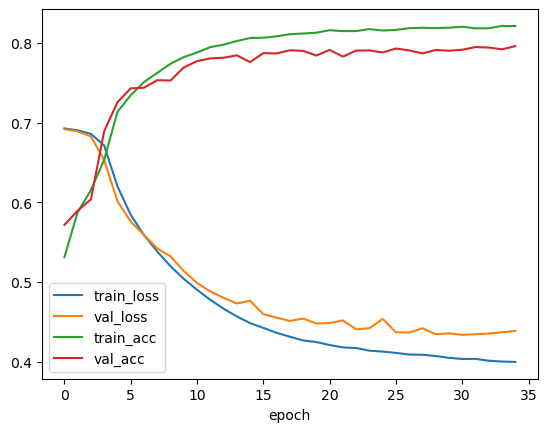

In [70]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# **순환층에 드롭아웃 적용**

- 순환층은 자체적으로 드롭아웃 기능을 제공
    - SimpleRNN 과 LSTM 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있음
        - dropout : 셀의 입력에 드롭아웃을 적용
        - recurrent_dropout : 순환되는 은닉 상태에 드롭아웃을 적용

# **2개의 층을 연결**

- 순환층을 연결할 때의 주의점
    - 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달
        - 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요함
        - 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야함
            - return_sequences 매개변수를 True로 지정

In [74]:
model2 = keras.Sequential()
model2.add(keras.Input(shape = (100,)))
model2.add(keras.layers.Embedding(500, 32))
model2.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model2.add(keras.layers.LSTM(8, dropout = 0.3))
model2.add(keras.layers.Dense(1, activation = "sigmoid"))

In [76]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 32)             │          16,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 8)              │           1,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,865 (69.79 KB)

 Trainable params: 17,865 (69.79 KB)

 Non-trainable params: 0 (0.00 B)

- 첫 번째 LSTM
    - 모든 타임스텝(100개)의 은닉 상태를 출력하기 때문에 출력의 크기가 (None, 100, 8)
- 두 번째 LSTM
    - 마지막 타임스텝의 은닉 상태만 출력하기 때문에 출력의 크기가 (None, 8)

In [79]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])

cp_cb = keras.callbacks.ModelCheckpoint("./model/best-2rnn-model.keras", save_best_only = True)
es_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [81]:
history = model2.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, y_val), callbacks = [cp_cb, es_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.5171 - loss: 0.6929 - val_accuracy: 0.5654 - val_loss: 0.6922
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.5609 - loss: 0.6917 - val_accuracy: 0.6070 - val_loss: 0.6896
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.6052 - loss: 0.6876 - val_accuracy: 0.6534 - val_loss: 0.6743
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.6478 - loss: 0.6635 - val_accuracy: 0.7022 - val_loss: 0.6009
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7040 - loss: 0.5921 - val_accuracy: 0.7298 - val_loss: 0.5515
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7351 - loss: 0.5487 - val_accuracy: 0.7542 - val_loss: 0.5211
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7628 - loss: 0.5145 - val_accuracy: 0.7260 - val_loss: 0.5495
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7695 - loss: 0

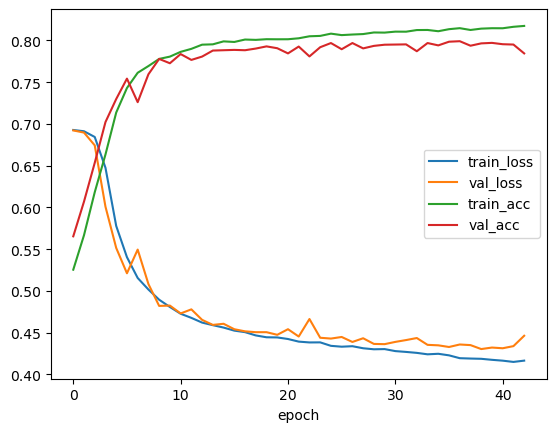

In [83]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# **GRU(Grated Recurrent Unit) 구조**

<img src = "./image/rnn_lstm_gru.png">

- LSTM을 간소화한 버전
- LSTM처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함
- LSTM보다 가중치가 적기 때문에 계산량이 적지만 성능은 LSTM과 유사함
    - 데이터 양이 적을 때는 GRU의 성능이 더 좋고 데이터의 양이 많을 때는 LSTM의 성능이 더 좋아지는 경향이 있음
    - GRU와 LSTM 중 어떤 것이 더 낫다 라고 말할 수는 없음

<img src="./image/gru.png" width="700" />

- GRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀 3개가 들어 있음
    - 2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh 활성화 함수를 사용
- reset_gate
    - 셀의 출력이 은닉 상태에 바로 곱해져 삭제 게이트 역할을 수행
- update_gate
    - 어떤 정보를 얼마만큼 유지하고 어떤 정보를 추가할지 결정하는 역할

In [88]:
model3 = keras.Sequential()
model3.add(keras.Input(shape = (100,)))
model3.add(keras.layers.Embedding(500, 32))
model3.add(keras.layers.GRU(8))
model3.add(keras.layers.Dense(1, activation = "sigmoid"))

In [90]:
model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 32)             │          16,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 8)                   │           1,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,017 (66.47 KB)

 Trainable params: 17,017 (66.47 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
((32 * 8) + (8 * 8) + 8 + 8) * 3

1008

In [94]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])

cp_cb = keras.callbacks.ModelCheckpoint("./model/best-gru-model.keras", save_best_only = True)
es_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [96]:
history = model3.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, y_val), callbacks = [cp_cb, es_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.5104 - loss: 0.6928 - val_accuracy: 0.5314 - val_loss: 0.6910
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.5555 - loss: 0.6894 - val_accuracy: 0.5558 - val_loss: 0.6876
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.5834 - loss: 0.6850 - val_accuracy: 0.5666 - val_loss: 0.6829
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.5940 - loss: 0.6792 - val_accuracy: 0.5862 - val_loss: 0.6760
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.5998 - loss: 0.6709 - val_accuracy: 0.5940 - val_loss: 0.6667
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.6227 - loss: 0.6581 - val_accuracy: 0.6166 - val_loss: 0.6546
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6345 - loss: 0.6420 - val_accuracy: 0.6290 - val_loss: 0.6389
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.6614 - loss: 0.6215 -

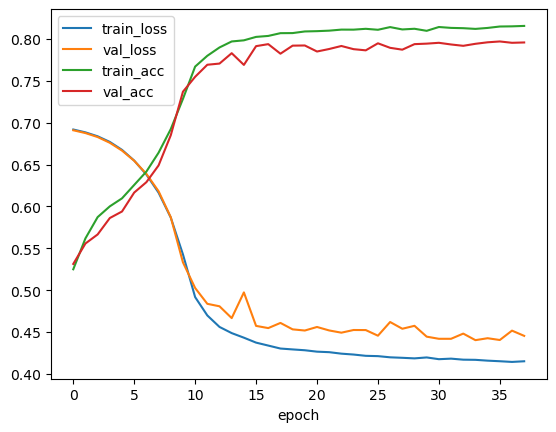

In [98]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# **Best Model 검증**

In [100]:
test_seq = pad_sequences(x_test, maxlen = 100)

In [102]:
rnn_model = keras.models.load_model("./model/best-lstm-model.keras")
rnn_model.evaluate(test_seq, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8029 - loss: 0.4258


[0.4266130030155182, 0.8023200035095215]